# KNU 감성사전을 통한 단어의 긍정/부정을 판단하기

In [173]:
# ### KNU 한국어 감성사전 -DI LAB
# - SentiWord info.json 한국어 감성사전 제공

import json
import pandas as pd
from tqdm import tqdm

In [174]:
import sqlite3

In [175]:
conn = sqlite3.connect("practice.db") # practice.db 연결
c = conn.cursor() # db를 사용하기 위한 cursor

In [ ]:
c.execute("SELECT text FROM newspapers") # newspaper text(기사)의 내용을 추출

articles = [] # list 선언

for row in c.fetchall():  # table의 내용을 반복하여 추출
  articles.append(row)  # 해당 내용을 articles list에 넣음

print(articles[0])  # articles[i]가 text 등 모든 내용을 포함한 기사 1개

In [ ]:
!python -m pip install konlpy

In [178]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  24945      0 --:--:-- --:--:-- --:--:-- 24945


In [179]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [180]:
from konlpy.tag import Mecab
mecab = Mecab()

In [181]:
# 의미 없는 단어(조사 등) 제외
stopwords = ['은', '도', '는', '다', '사', '의', '위', '제', '회', '등', '가', '이', '했', '한', '에', '애', '하', '보', '웃', '고', '곧', '정', '적', '순', '뜻', '용', '열', '유', '뜻', '잘', '못', '타', '희', '히', '점', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '개', '것', '명', '원', '세','에서', '이고', '라고', '다고', '라기', '라며', '면서', '라면서', '로써', '로서', '로', '으로', '뿐', '에서', '어야', '부터', '었', '았', '한다', '이다', '였다', '였었다', '|', '/','‘', '’', ',' , '“', '”', '.', '>', '<', ')', '(']

In [182]:
import re

result = re.sub('[^가-힣ㄱ-ㅎㅠ ]','', wor)

In [183]:
def mec(i):
  words = list()
  for tok in articles[i]:
    temp = ''.join(tok)
    temp_re = re.sub('[^가-힣ㄱ-ㅎㅠ ]','', temp)
    encoded = mecab.morphs(temp_re)
    wd = [item for item in encoded if item not in stopwords]  # ('[^가-힣ㄱ-ㅎㅠ ]','')
    words.append(wd)

  return words

In [78]:
for i in range(len(articles)):
  mec(i)

In [ ]:
# from konlpy.tag import Okt
# okt = Okt()
# morp = okt.morphs(txt)
# print(morp)

#### 사전에 단어 추가하는 부분(단어 추가하지 않을꺼면 필요없음)

In [4]:
# SentiWord = pd.read_json('SentiWord_info.json') # json 파일 불러옴
# SentiWord.to_csv('SentiWord_info.csv', index=False) # json 파일을 csv로 저장

In [190]:
sw = pd.read_csv('SentiWrod_info1.csv')
sw

,word,word_root,polarity
0,가난,가난,-1
1,가난뱅이,가난,-1
2,가난살이,가난,-1
3,가난살이하다,가난,-1
4,가난설음,가난,-1
...,...,...,...
14662,원더풀,원더,1
14663,쾌적,쾌적,1
14664,쾌적한,쾌적,1
14665,쾌적하다,쾌적,1


In [197]:
SentiWord = pd.read_csv('SentiWrod_info1.csv') # csv를 불러옴
SentiWord.loc[len(SentiWord)] = ['징용','징용',-2]  # 맨 끝에 징용 -2를 줌
SentiWord.loc[len(SentiWord)] = ['합의','합의',1] # 맨 끝에 합의 +1 을 줌
SentiWord.tail()

def pos_neg(word):
    tmp =SentiWord[(SentiWord['word']==word) | (SentiWord['word_root']==word)]
    try:
        word_res = (word,tmp['polarity'][tmp.index[0]])
    except:
        word_res = (word, 0)
    return word_res


In [192]:
def read_data(filename, encoding='cp949'):
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:]
  return data

In [209]:
article = mec(0)

In [210]:
from tqdm import tqdm
pos_list = []
neg_list = []
unkown_list = []

for noun in tqdm(article[0], '긍/부정 나누기'):
    word_res = pos_neg(noun)
    if word_res[1] > 0:
        pos_list.append(word_res[0])
    elif word_res[1] < 0 :
        neg_list.append(word_res[0])
    else:
        unkown_list.append(word_res)

긍/부정 나누기: 100%|██████████| 55/55 [00:00<00:00, 379.59it/s]


In [211]:
print('긍정키워드 수:', len(pos_list),'개')
print('부정키워드 수:', len(neg_list),'개')
print('중립 또는 모름 키워드 수:', len(unkown_list),'개')

긍정키워드 수: 0 개
부정키워드 수: 3 개
중립 또는 모름 키워드 수: 52 개


In [208]:
from collections import Counter #jdk 제공 모듈

pos_count = dict(Counter(pos_list).most_common()) # 단어별 갯수 계산 및 내림차순 정렬, 딕셔너리 구조
neg_count = dict(Counter(neg_list).most_common())
unknown_count = dict(Counter(unkown_list).most_common())
print(pos_count)
print(neg_count)
print(unkown_count)

{'세계': 3, '윤리': 1, '가장': 1}
{'금지': 3, '자격': 2, '여자': 2, '해': 1, '여유': 1, '멀리': 1, '박탈': 1, '당하': 1, '갖추': 1, '못한': 1}
{('-', 0): 9, ('세트', 0): 6, ('대표', 0): 5, ('팀', 0): 5, ('일본', 0): 5, ('김연경', 0): 5, ('5', 0): 4, ('박정아', 0): 4, ('14', 0): 4, ('여자', 0): 3, ('배구', 0): 3, ('8', 0): 3, ('도쿄', 0): 3, ('2', 0): 3, ('블로킹', 0): 3, ('오픈', 0): 3, ('9', 0): 3, ('12', 0): 3, ('기회', 0): 3, ('일', 0): 2, ('승부', 0): 2, ('상대', 0): 2, ('김희진', 0): 2, ('시간', 0): 2, ('며', 0): 2, ('분위기', 0): 2, ('11', 0): 2, ('네트', 0): 2, ('볼', 0): 2, ('다시', 0): 2, ('번', 0): 2, ('찾아왔', 0): 2, ('서브', 0): 2, ('마지막', 0): 2, ('꺾', 0): 1, ('진출', 0): 1, ('확정', 0): 1, ('한국', 0): 1, ('31', 0): 1, ('아리아케', 0): 1, ('아레나', 0): 1, ('열린', 0): 1, ('2020', 0): 1, ('올림픽', 0): 1, ('조별', 0): 1, ('리그', 0): 1, ('A', 0): 1, ('조', 0): 1, ('본전', 0): 1, ('대접전', 0): 1, ('끝', 0): 1, ('스코어', 0): 1, ('3', 0): 1, ('이겼', 0): 1, ('였', 0): 1, ('맞선', 0): 1, ('치', 0): 1, ('양보', 0): 1, ('명승부', 0): 1, ('이어졌', 0): 1, ('앞선', 0): 1, ('던', 0): 1, ('살아났', 0): 1,

In [152]:
tmp_dic = {}
for key, value in pos_count.items():
    if key not in stopwords:
        tmp_dic[key]=value

pos_count = tmp_dic

print(tmp_dic)

{'신': 3, '충분히': 2, '중요': 2, '적극': 1, '크': 1, '발전': 1, '해결': 1, '필요': 1, '가치': 1, '많': 1, '타당': 1, '노력': 1, '새로운': 1, '추진': 1, '좋': 1}


In [153]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [154]:
### https://www.w3schools.com/colors/colors_hexadecimal.asp
def color_func(**kawargs):
    color="#0b1177"
    return color

In [155]:
img_path = 'good.jpg'
cloud_mask = np.array(Image.open(img_path))
cloud_mask.shape

img = Image.open(img_path)
img.size

(831, 789)

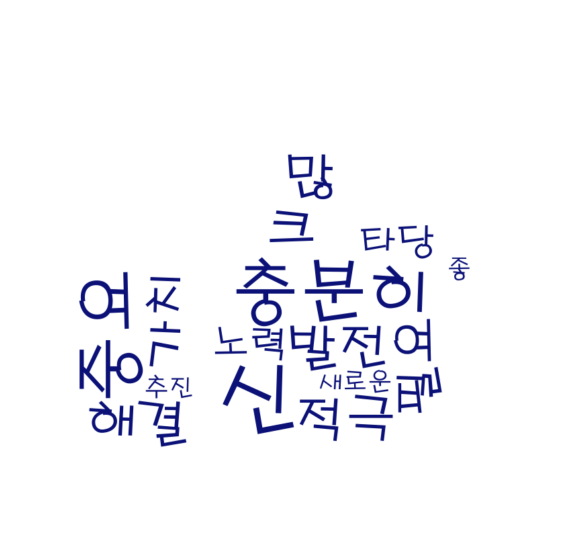

In [156]:
wordcloud = WordCloud(font_path="H2PORL.TTF",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(pos_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()

In [166]:
img_path = 'bad.jpg'
cloud_mask = np.array(Image.open(img_path))
cloud_mask.shape

img = Image.open(img_path)
img.size

(831, 789)

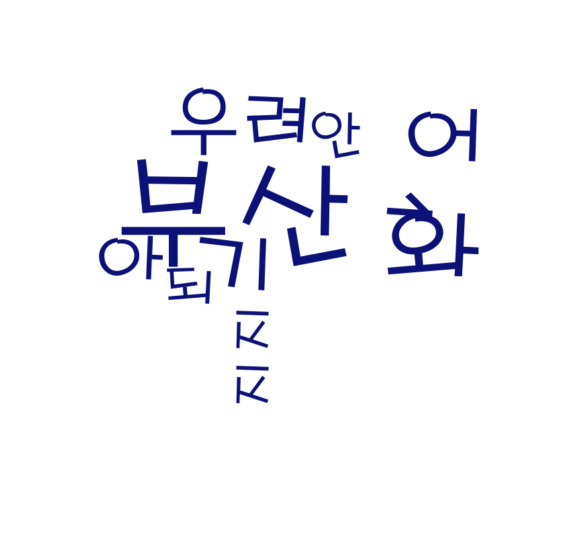

In [172]:
wordcloud = WordCloud(font_path="H2PORL.TTF",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(neg_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()